In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
import numpy as np
import os

from pathlib import Path
import nbconvert
import base64
import nbformat

initialize SQL database

In [ ]:
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
HOST = '127.0.0.1'  
USER = 'postgres'
PASSWORD = 'password'
DATABASE = 'AQI'
PORT = 5432  


engine = create_engine(f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")

load total dates over months/years into pandas DF

In [ ]:

sql_file_path = os.path.join("..", "03_SQL_queries", "03_aqi_date_count_YM.sql")  # Replace path as necessary


with open(sql_file_path, 'r') as file:
    query = file.read()

df = pd.read_sql(query, engine)


print(df.head())       
print(df.info())       


     year  month  count
0  2014.0   12.0   5627
1  2015.0    1.0  59017
2  2015.0    2.0  57487
3  2015.0    3.0  63507
4  2015.0    4.0  61549
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    91 non-null     float64
 1   month   91 non-null     float64
 2   count   91 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.3 KB
None


create scatterplot to see overall distibutation of dates accross dataset

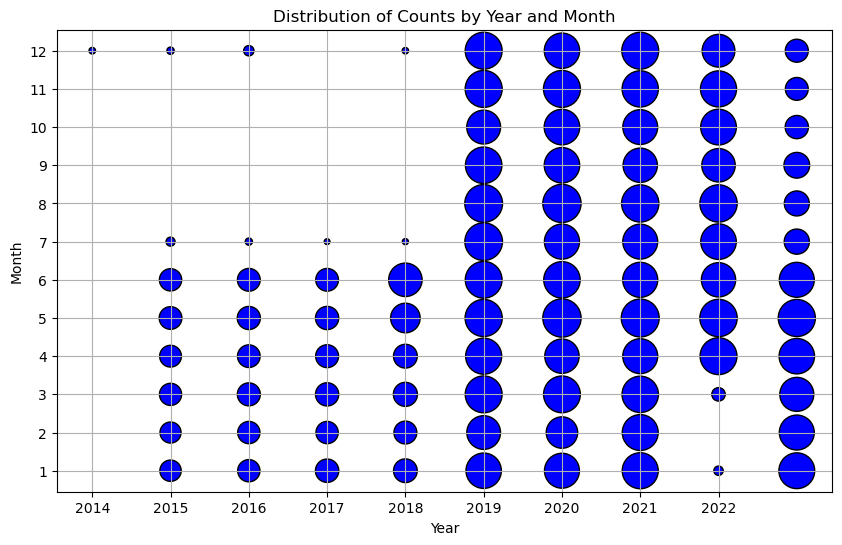

In [ ]:
# all data over years/months

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['month'], s=df['count'] / 250, alpha=1, c='blue', edgecolors='k')

# Add labels and title
plt.title('Distribution of Counts by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(range(2014, 2023))  # Adjust based on your year range
plt.yticks(range(1, 13))  # Months from 1 to 12
plt.grid(True)


plt.show()


load dates over days/months/years into pandas DF

In [ ]:

sql_file_path = os.path.join("..", "03_SQL_queries", "04_aqi_date_count_YMD.sql")  # replace path as necessary


with open(sql_file_path, 'r') as file:
    query = file.read()

df = pd.read_sql(query, engine)


print(df.head())       
print(df.info())       

     year  month   day        date  count
0  2014.0   12.0  29.0  2014-12-29   1883
1  2014.0   12.0  30.0  2014-12-30   1867
2  2014.0   12.0  31.0  2014-12-31   1877
3  2015.0    1.0   1.0  2015-01-01   1767
4  2015.0    1.0   2.0  2015-01-02   1772
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2408 non-null   float64
 1   month   2408 non-null   float64
 2   day     2408 non-null   float64
 3   date    2408 non-null   object 
 4   count   2408 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 94.2+ KB
None


create heatmap to see overall distribution of dates accross days/months/years

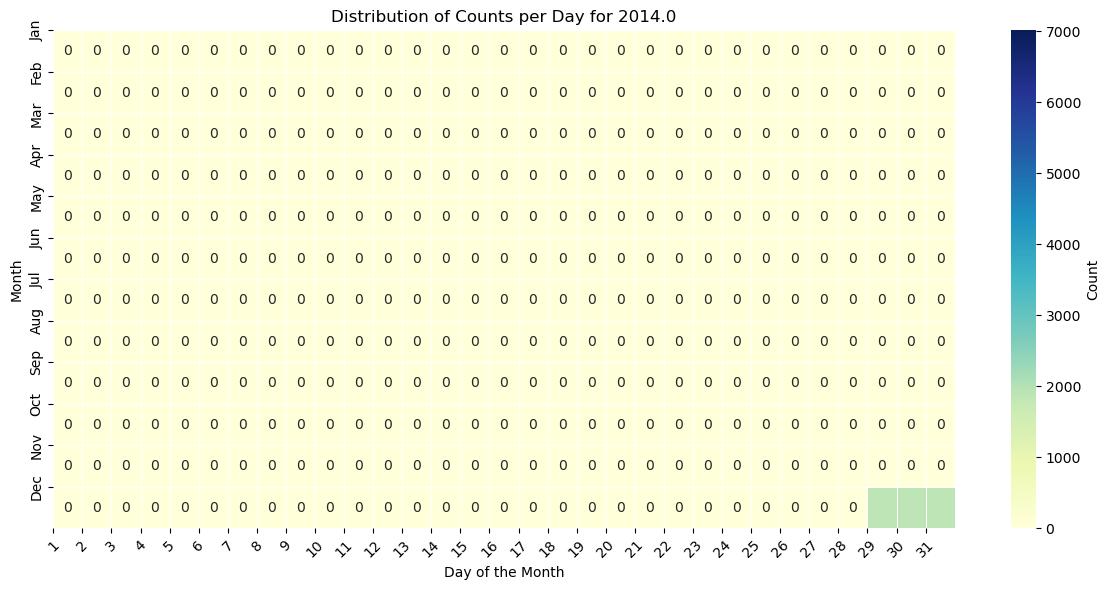

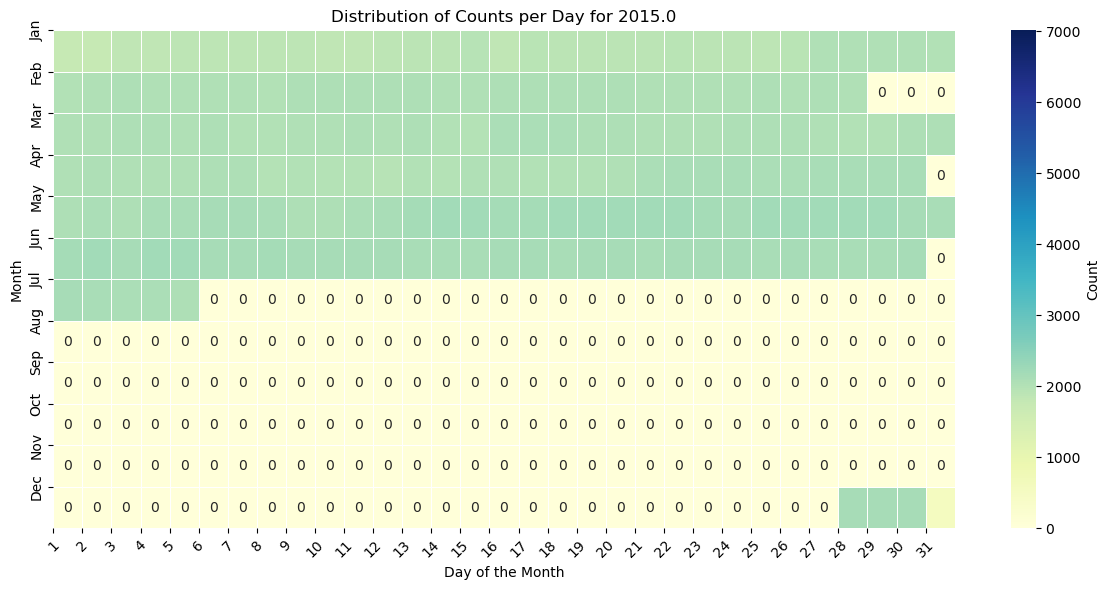

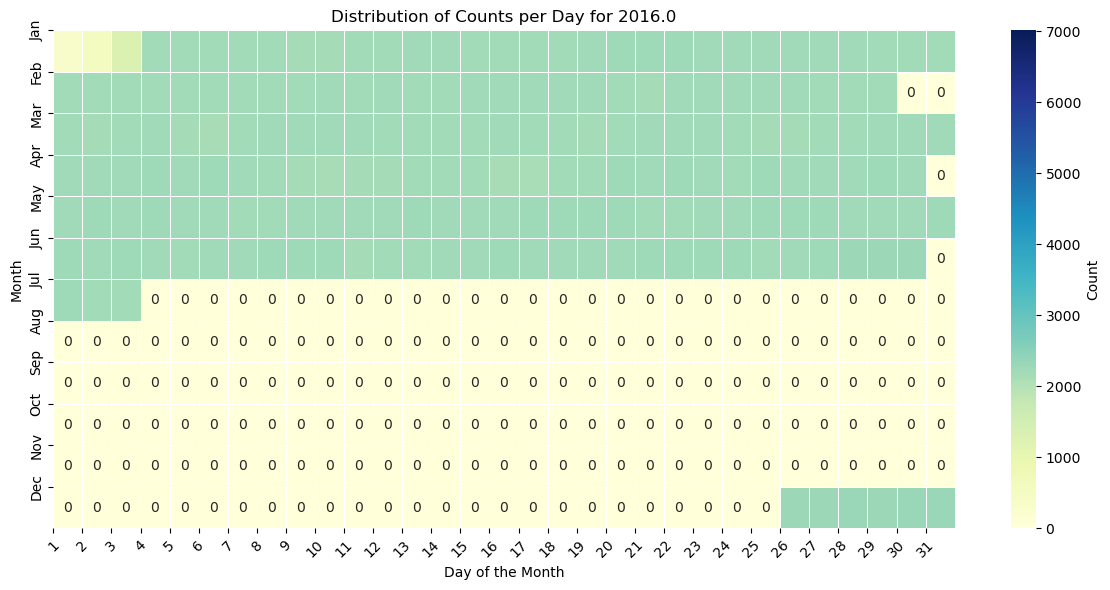

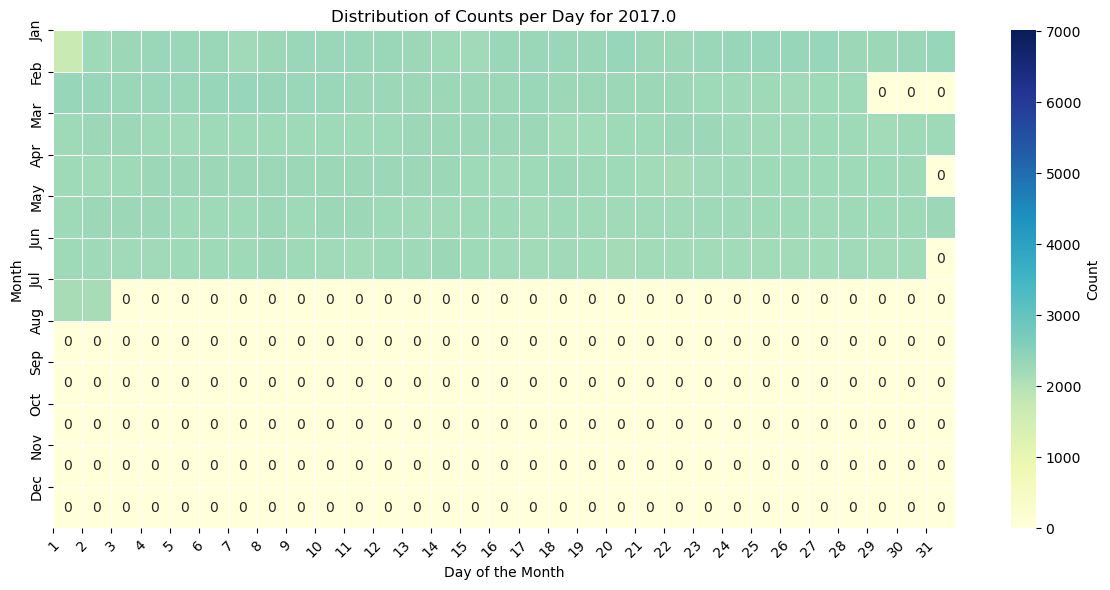

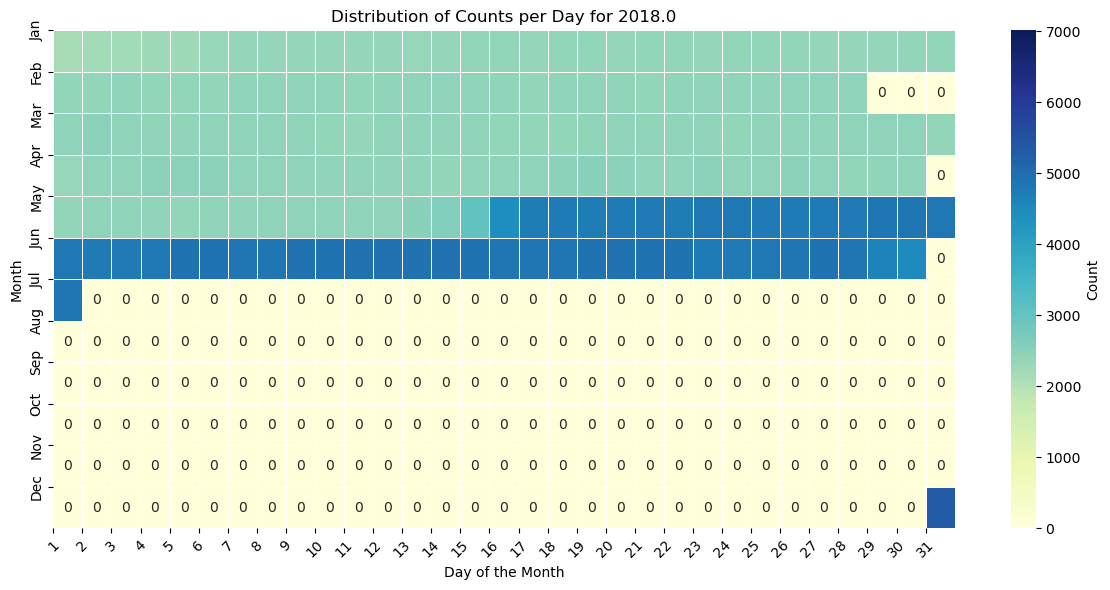

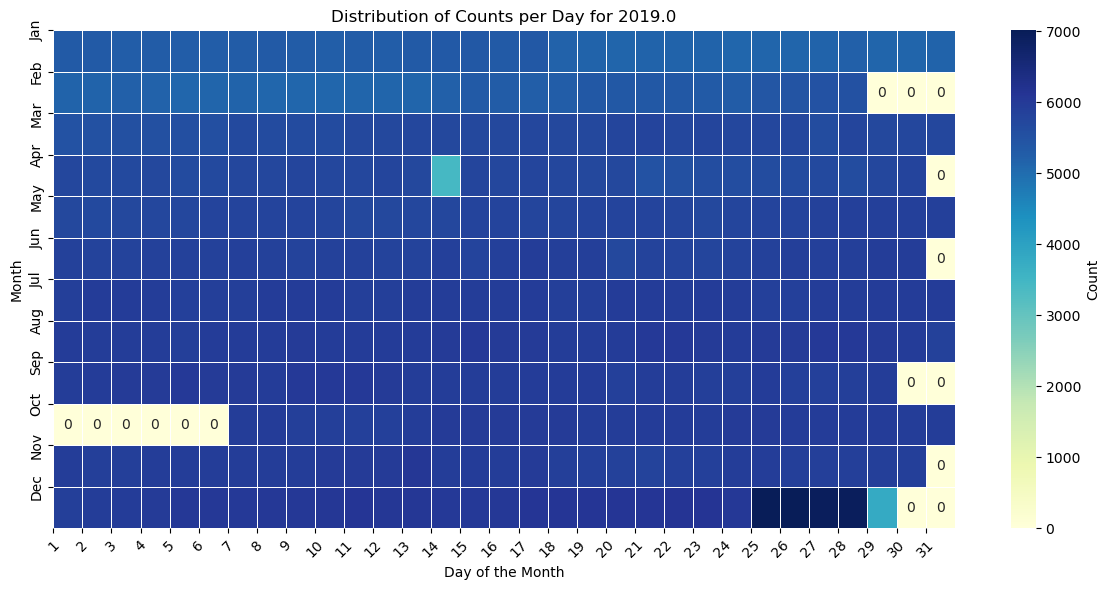

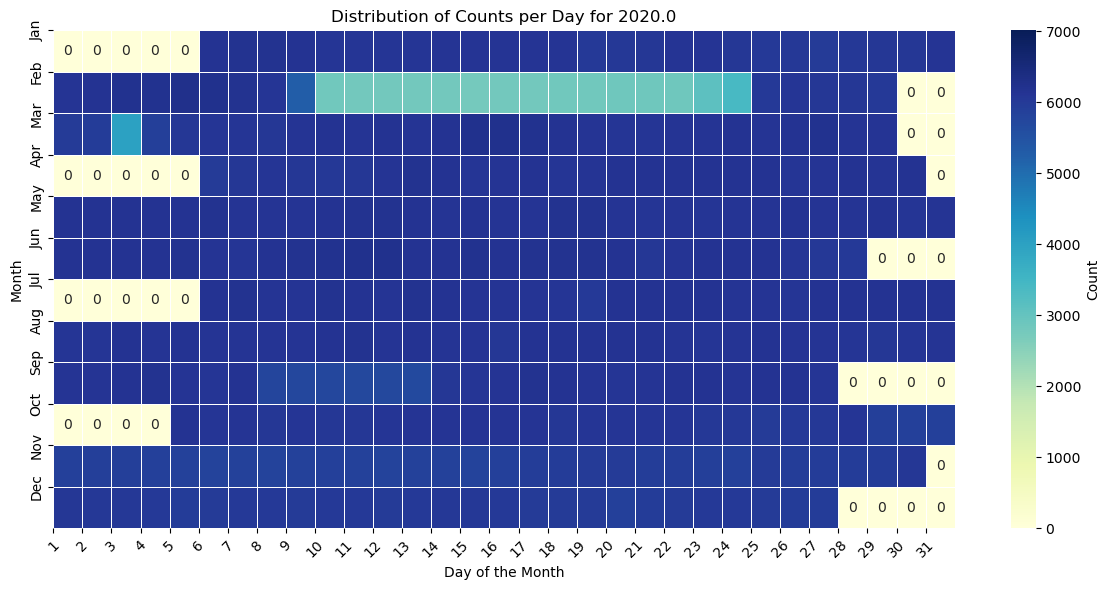

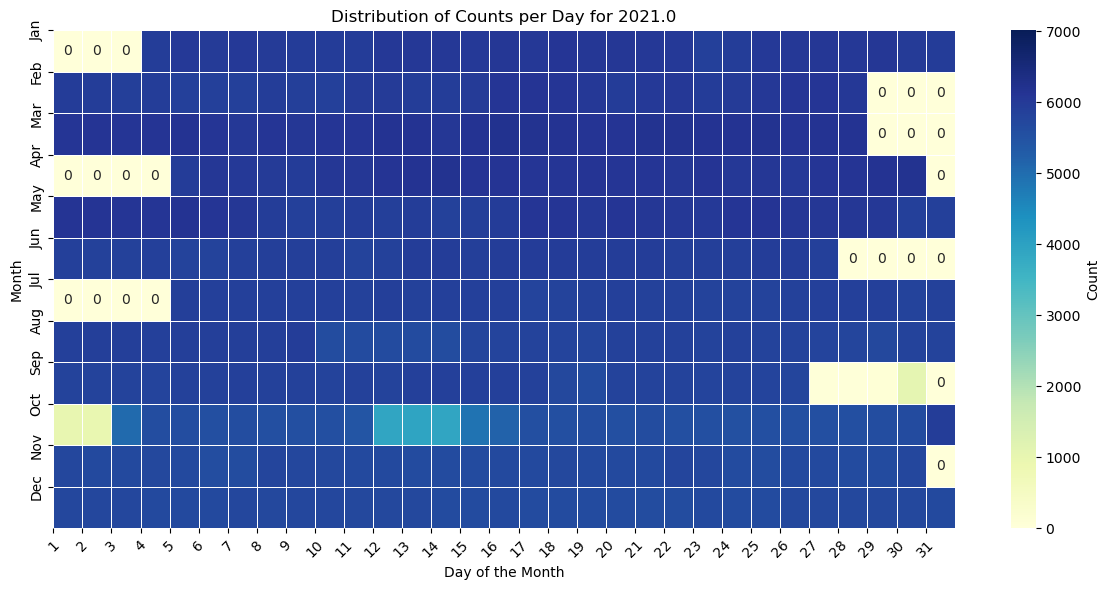

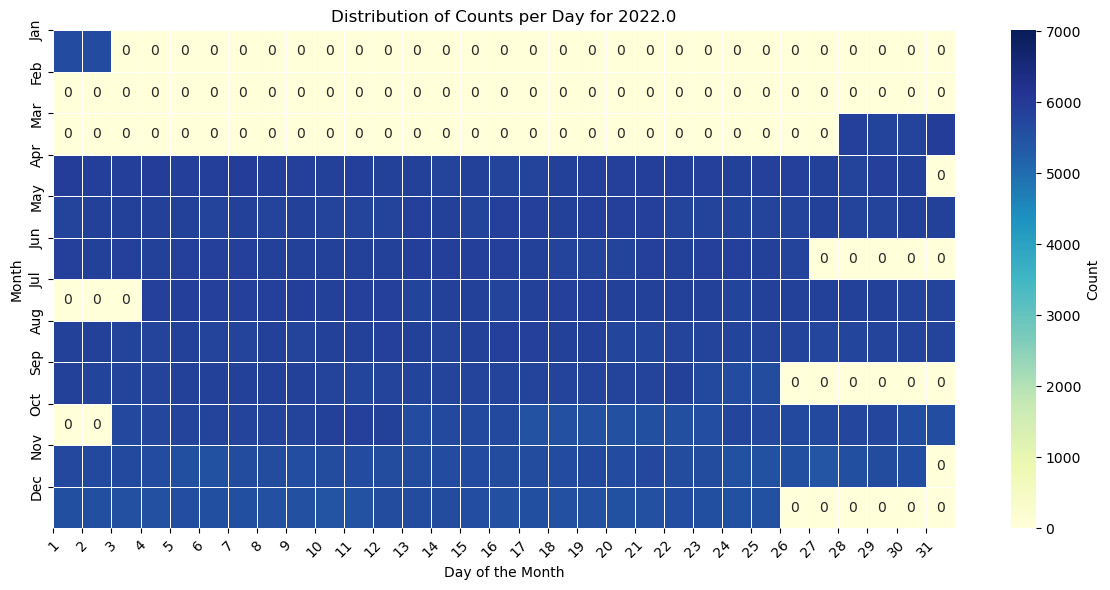

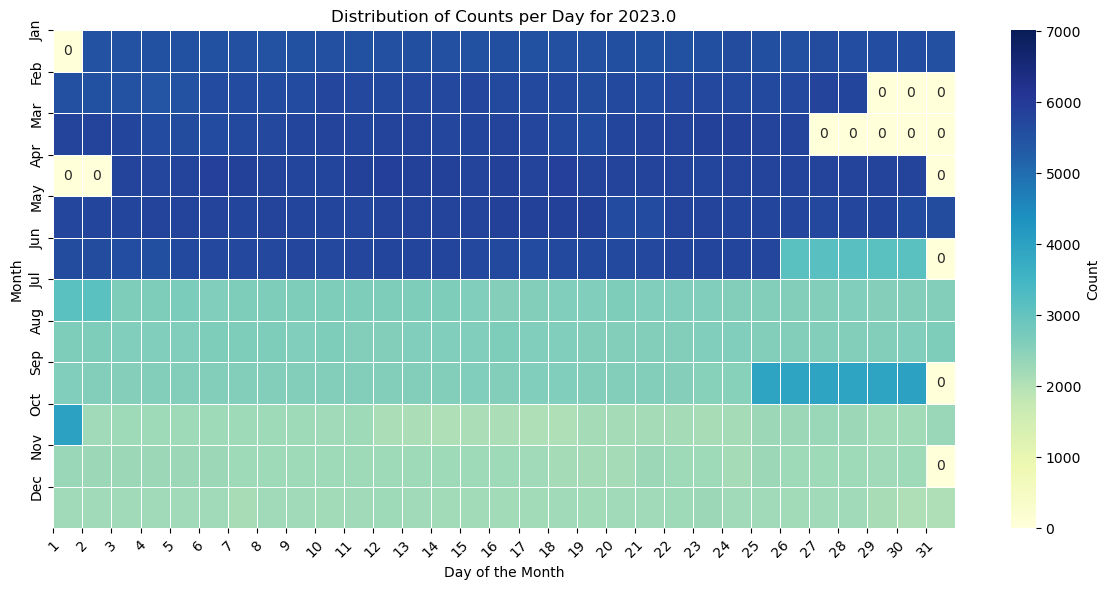

In [ ]:
# Get max count for consistent x,y axis values

max_count = df['count'].max()

# Get unique years in the dataset
years = df['year'].unique()

# Heatmap for each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter data for the specific year
    year_data = df[df['year'] == year]
    
    # Create a pivot table with months as rows and days as columns
    heatmap_data = year_data.pivot_table(index='month', columns='day', values='count', aggfunc='sum', fill_value=0)
    
    # Ensure all 31 days are included in the columns (even if some days have no data)
    heatmap_data = heatmap_data.reindex(columns=range(1, 32), fill_value=0)
    
    # Ensure all 12 months are included in the index (even if some months have no data)
    heatmap_data = heatmap_data.reindex(index=range(1, 13), fill_value=0)
    
    # Only show '0' for cells with a count of zero, otherwise blank
    annot_data = np.where(heatmap_data == 0, '0', '')

    # Create fixed color scale from 0 to max_count
    sns.heatmap(
        heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Count'}, annot=annot_data, fmt="s", 
        linewidths=0.5, vmin=0, vmax=max_count
    )
    
    # Titles and labels
    plt.title(f'Distribution of Counts per Day for {year}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Month')
    plt.xticks(ticks=range(0, 31), labels=range(1, 32), rotation=45)
    plt.yticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    
    plt.tight_layout()
    plt.show()

load overall 'variable' counts into pandas DF

In [ ]:

sql_file_path = os.path.join("..", "03_SQL_queries", "05_aqi_variable_count_YM.sql")  # replace path as necessary


with open(sql_file_path, 'r') as file:
    query = file.read()

df = pd.read_sql(query, engine)


print(df.head())      
print(df.info())       



     year  month variable  count
0  2014.0   12.0      uvi     36
1  2014.0   12.0      so2    872
2  2014.0   12.0     pm25    915
3  2014.0   12.0     pm10   1012
4  2014.0   12.0       o3    958
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1565 non-null   float64
 1   month     1565 non-null   float64
 2   variable  1565 non-null   object 
 3   count     1565 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 49.0+ KB
None


create bar graph for distributation of each individual/unique variable over each year

        two types of variables discovered: pollutant and weather goruped accordingly 

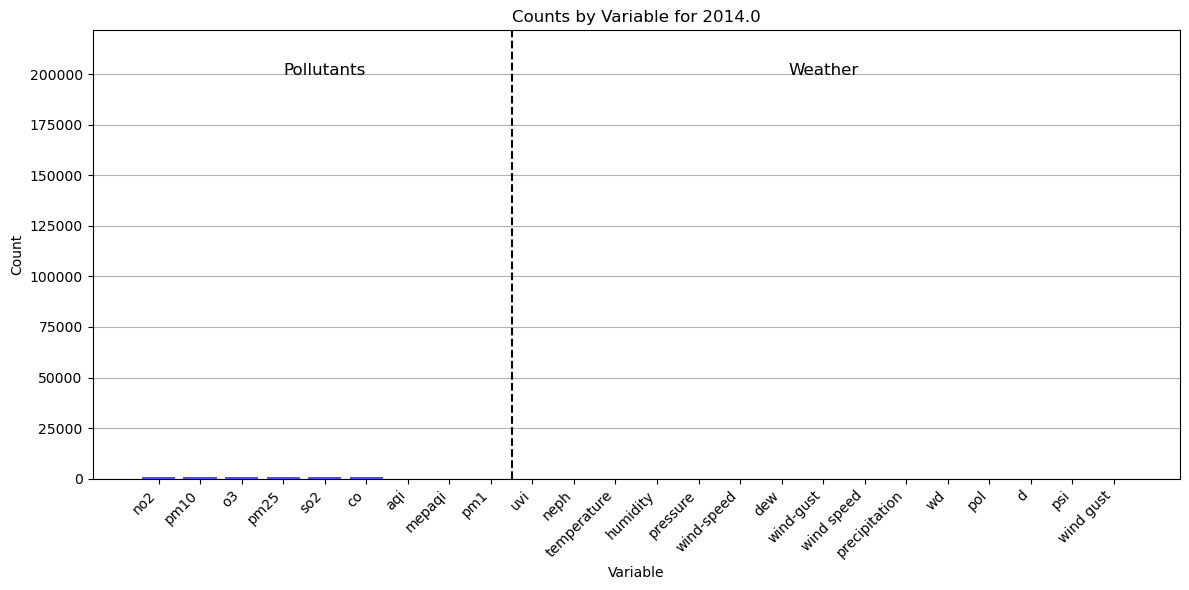

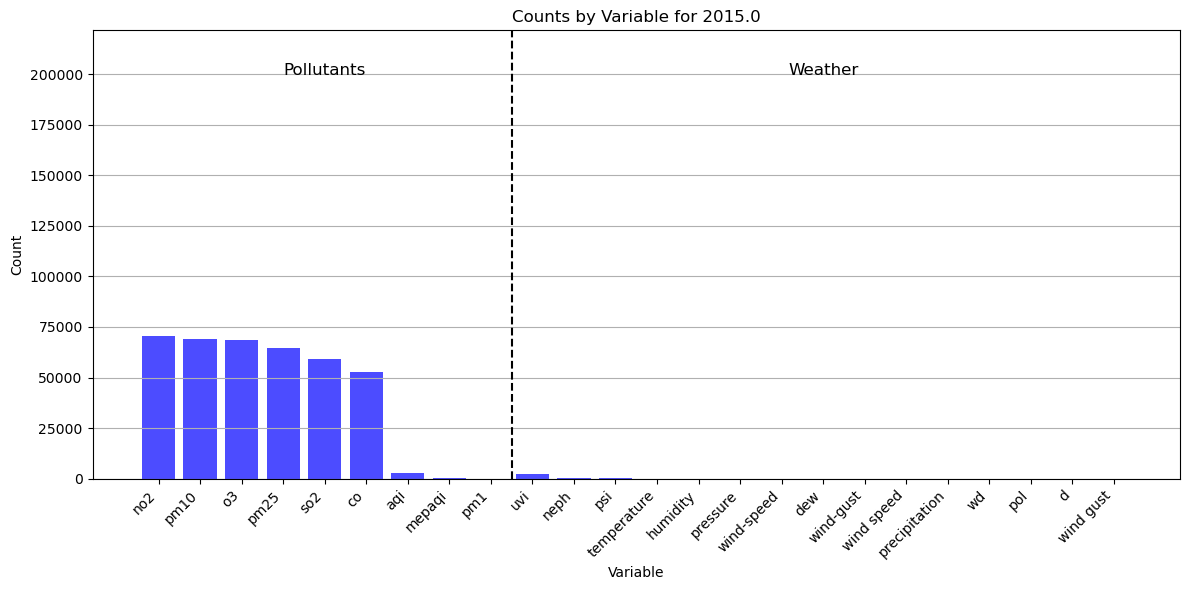

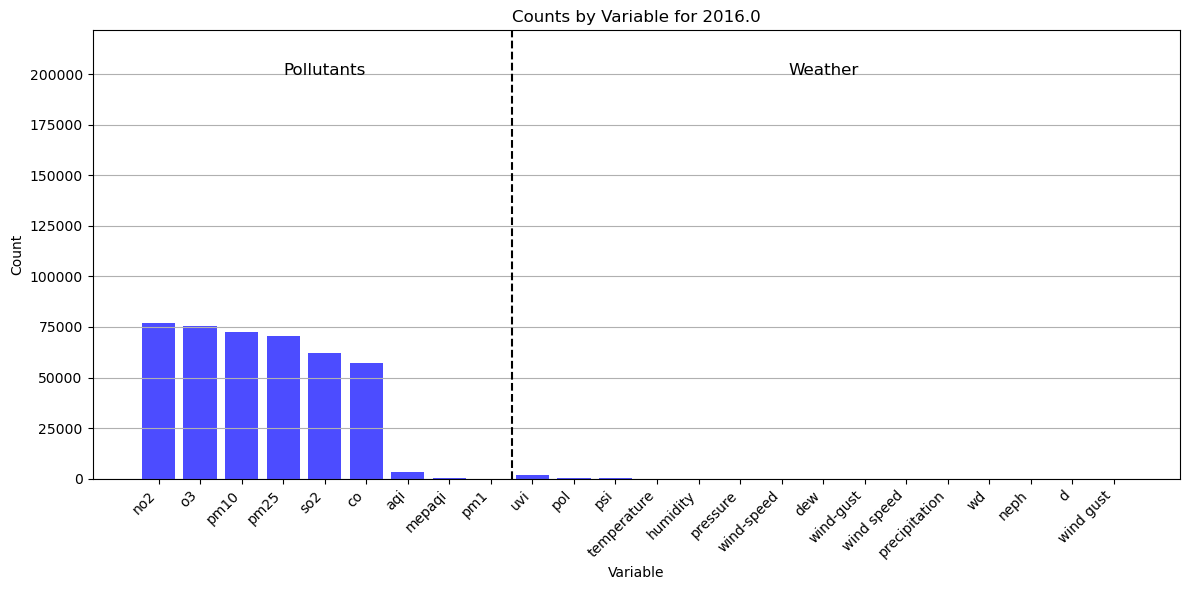

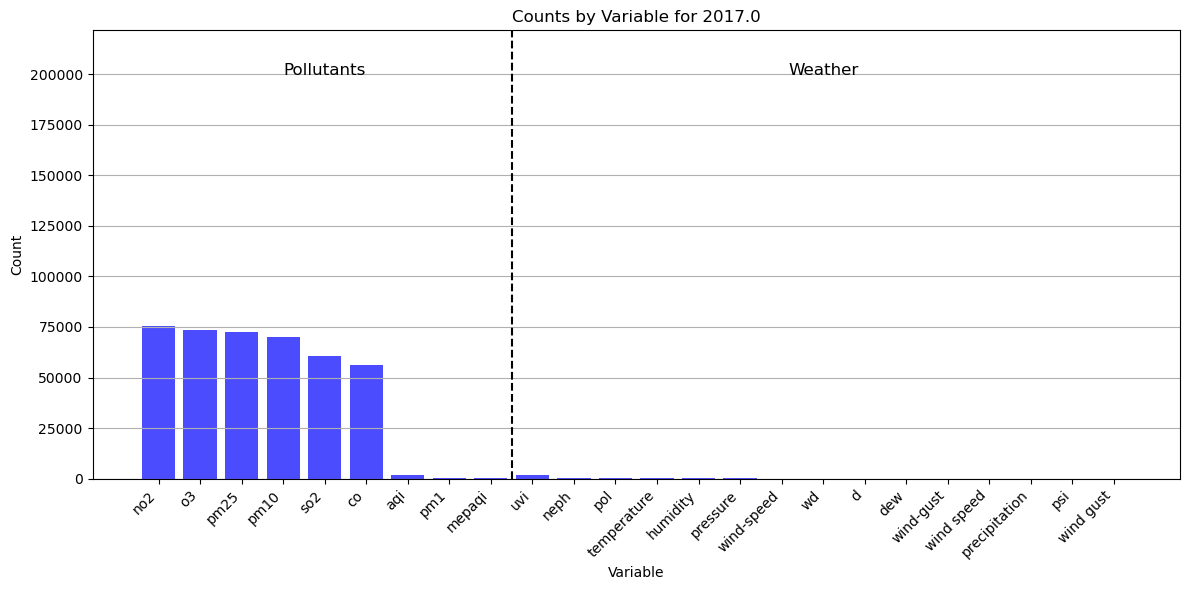

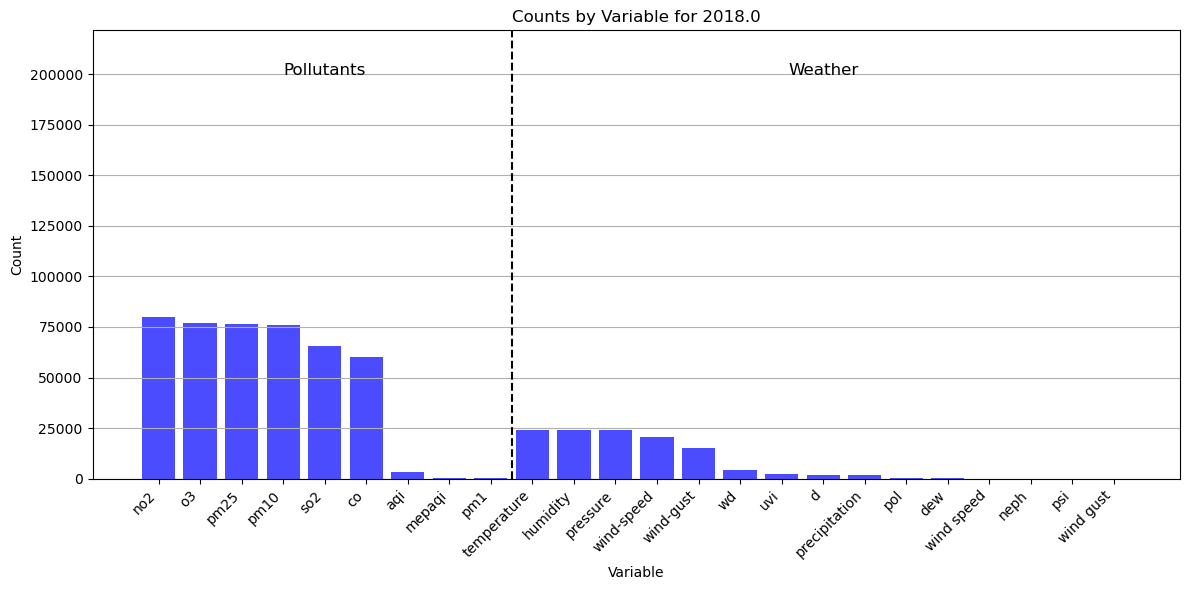

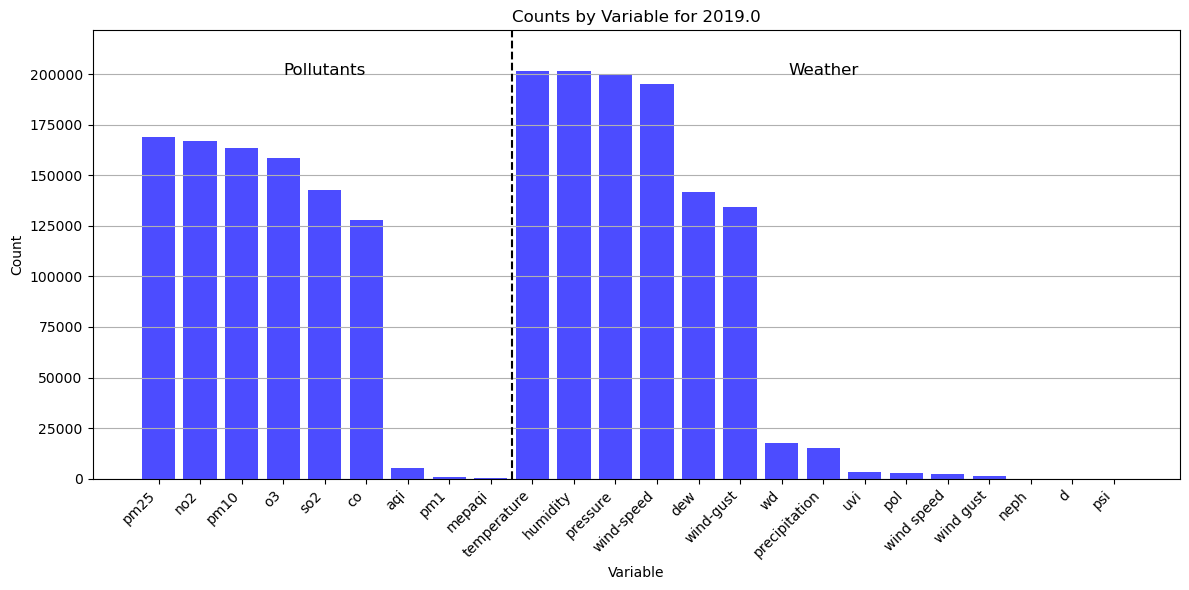

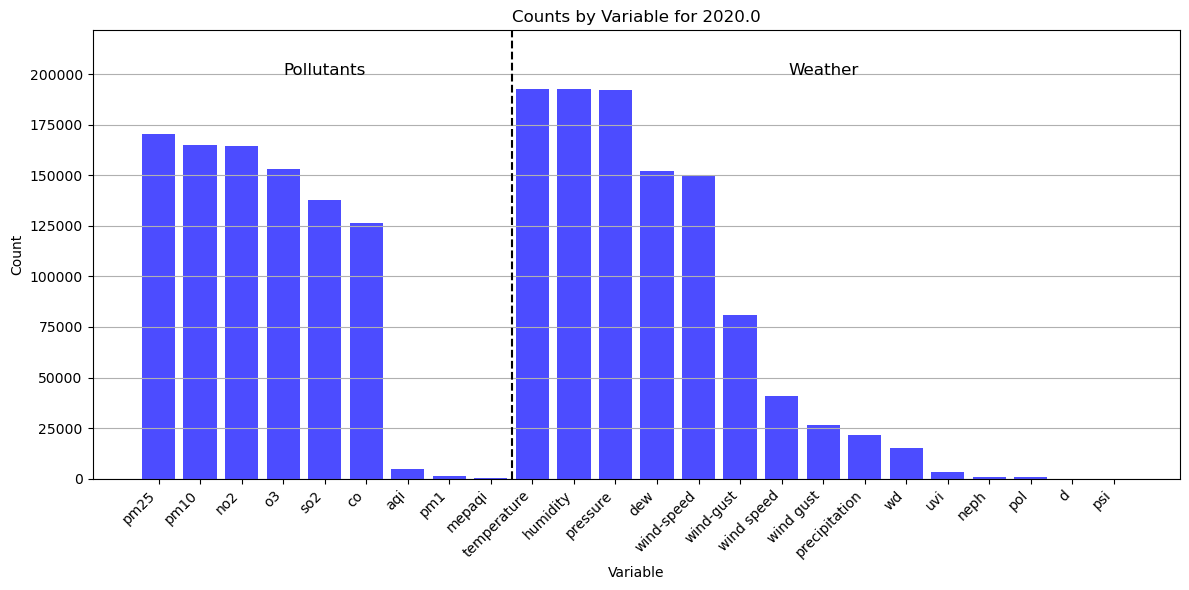

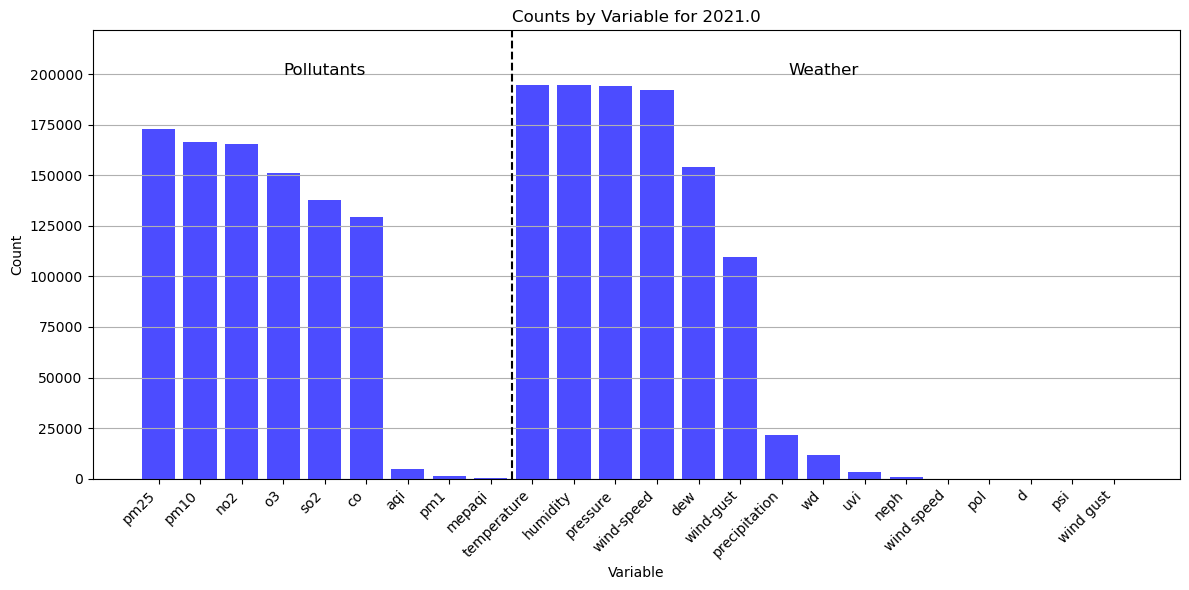

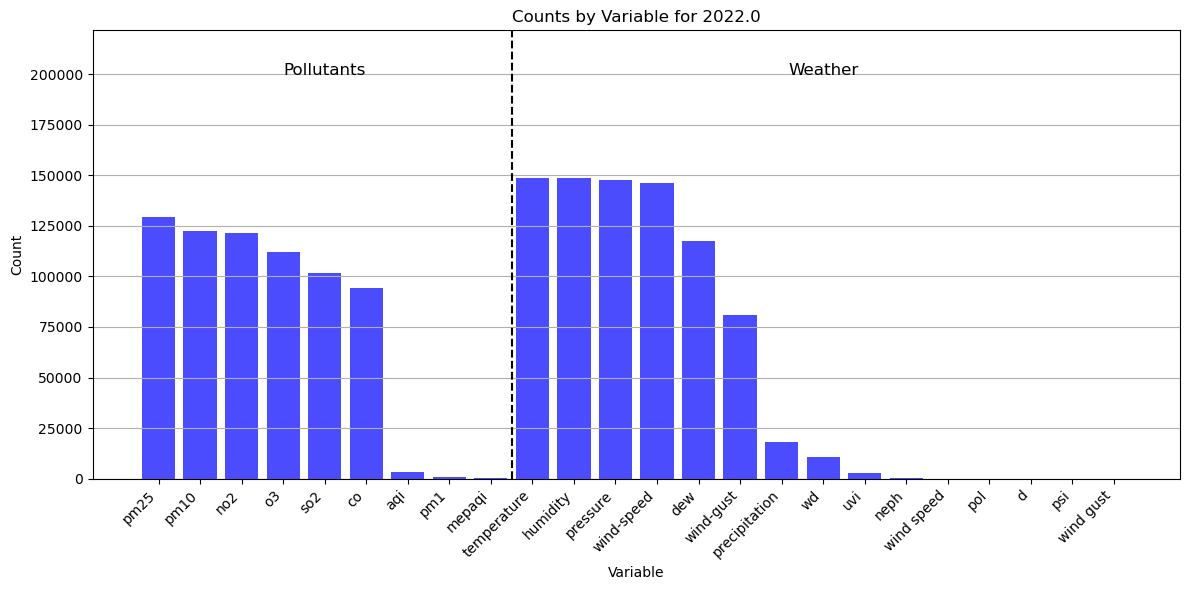

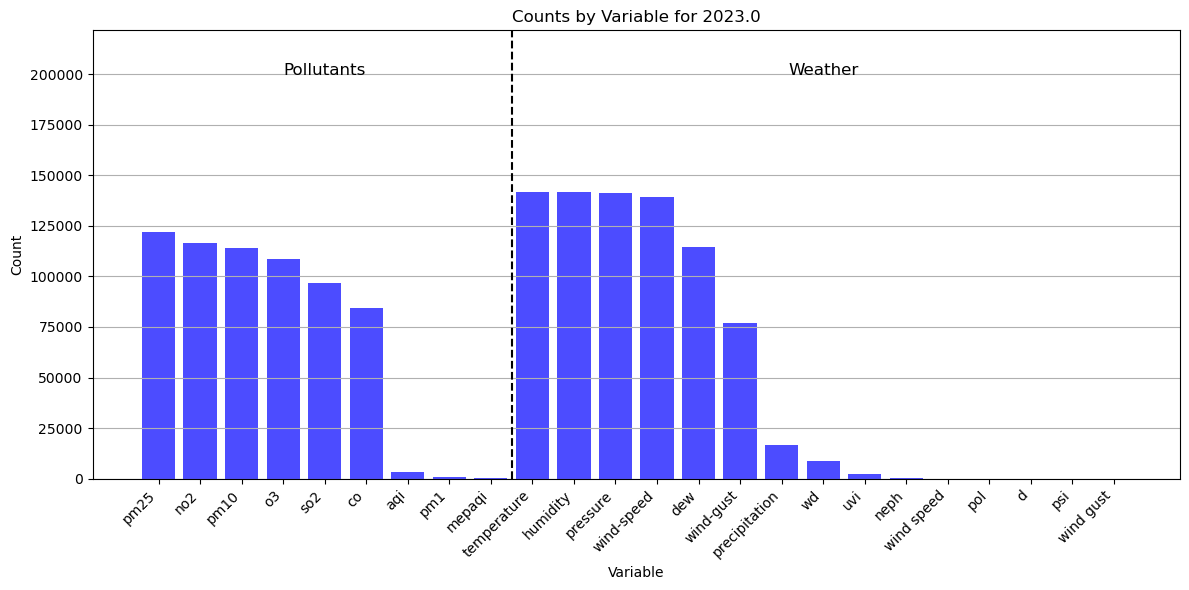

In [ ]:
years = df['year'].unique()

# Define the groups of variables
pollutants = ['no2', 'o3', 'pm25', 'pm10', 'so2', 'co', 'aqi', 'pm1', 'mepaqi']
weather = ['temperature', 'humidity', 'pressure', 'wind-speed', 'dew', 'wind-gust', 'wind speed', 'precipitation', 'wd', 'uvi', 'neph', 'pol', 'd', 'psi', 'wind gust']

# Variable to store the maximum count across all years
max_count = 0

# Calculate the maximum count across all years to set the y-axis limit
for year in years:
    year_data = df[df['year'] == year].groupby('variable', as_index=False)['count'].sum()
    year_data = year_data.set_index('variable').reindex(pollutants + weather, fill_value=0).reset_index()
    year_max = year_data['count'].max()
    if year_max > max_count:
        max_count = year_max

# Create bar charts for each year
for year in years:
    plt.figure(figsize=(12, 6))

    # Filter data for the current year and group by variable, summing counts
    year_data = df[df['year'] == year].groupby('variable', as_index=False)['count'].sum()

    # Reindex to include all variables, filling missing ones with 0
    year_data = year_data.set_index('variable').reindex(pollutants + weather, fill_value=0).reset_index()

    # Sort pollutants and weather variables separately
    year_data['group'] = year_data['variable'].apply(lambda x: 'Pollutants' if x in pollutants else 'Weather')
    year_data['count'] = year_data['count'].astype(float)
    
    # Order by group and then by count within each group
    year_data = year_data.sort_values(by=['group', 'count'], ascending=[True, False])

    # Create bar chart
    plt.bar(year_data['variable'], year_data['count'], color='blue', alpha=0.7)

    # Labels and title
    plt.title(f'Counts by Variable for {year}')
    plt.xlabel('Variable')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  
    plt.grid(axis='y')

    # Set the y-axis limit to the maximum count
    plt.ylim(0, max_count * 1.1)  

    # Subgroup labels 
    plt.axvline(x=len(pollutants) - 0.5, color='black', linestyle='--')  
    plt.text(len(pollutants) / 2 - 0.5, plt.ylim()[1] * 0.9, 'Pollutants', ha='center', fontsize=12)
    plt.text(len(pollutants) + len(weather) / 2 - 0.5, plt.ylim()[1] * 0.9, 'Weather', ha='center', fontsize=12)

    
    plt.tight_layout()
    plt.show()

Load dates for each unique variable into pandas DF

In [ ]:

sql_file_path = os.path.join("..", "03_SQL_queries", "06_aqi_variable_count_YMD.sql")  # replace path as necessary


with open(sql_file_path, 'r') as file:
    query = file.read()

df = pd.read_sql(query, engine)


print(df.head())       
print(df.info())       


     year  month   day variable  count
0  2014.0   12.0  29.0      uvi     12
1  2014.0   12.0  29.0      so2    291
2  2014.0   12.0  29.0     pm25    306
3  2014.0   12.0  29.0     pm10    338
4  2014.0   12.0  29.0       o3    322
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40930 entries, 0 to 40929
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      40930 non-null  float64
 1   month     40930 non-null  float64
 2   day       40930 non-null  float64
 3   variable  40930 non-null  object 
 4   count     40930 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB
None


Create heatmap to see the distribution of variable counts accross the years

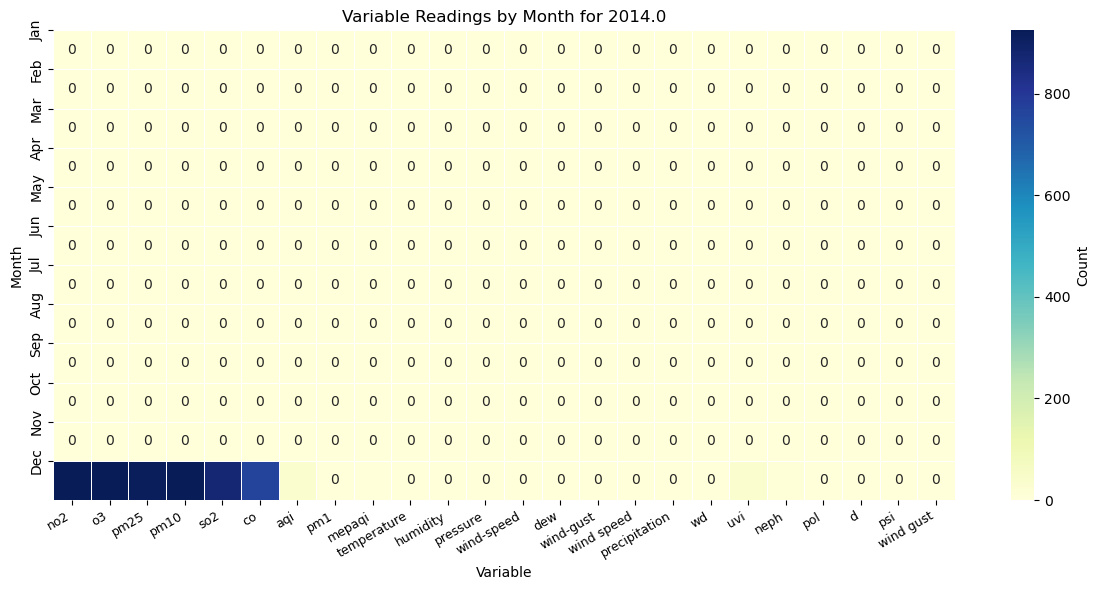

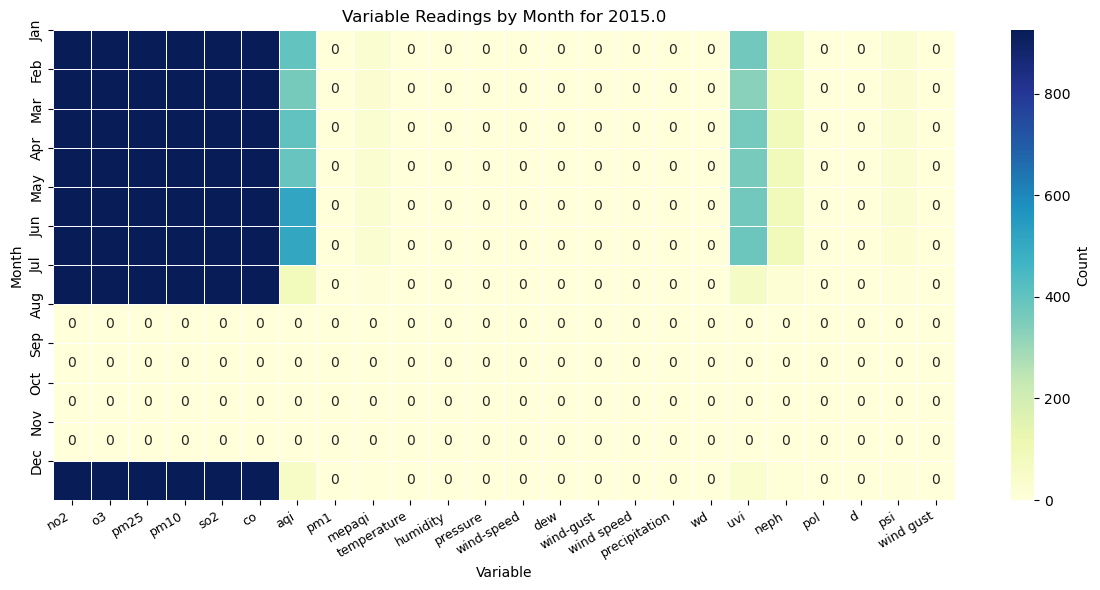

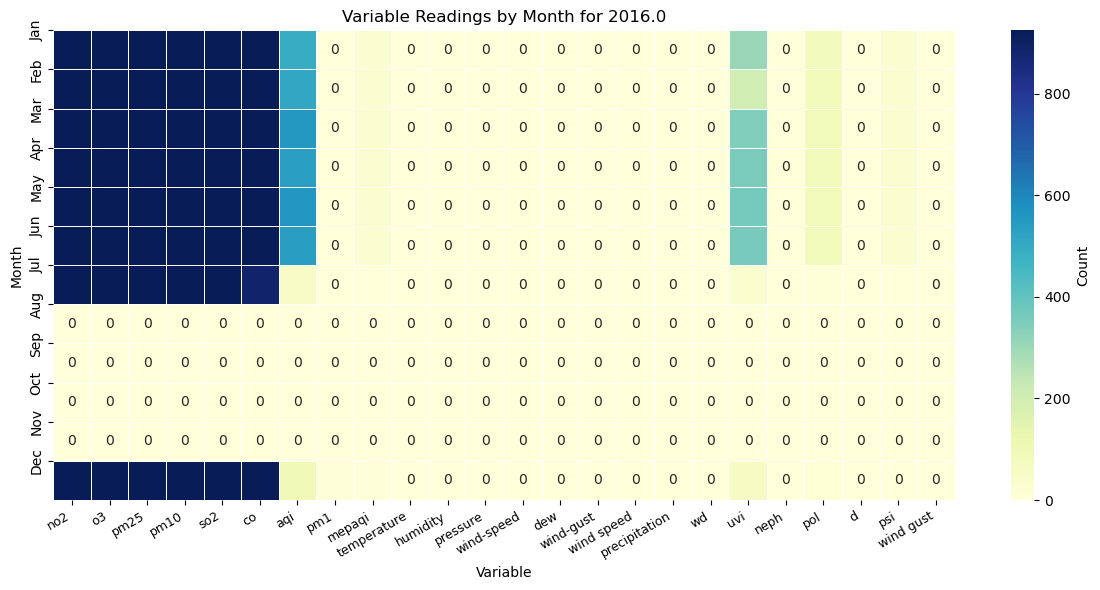

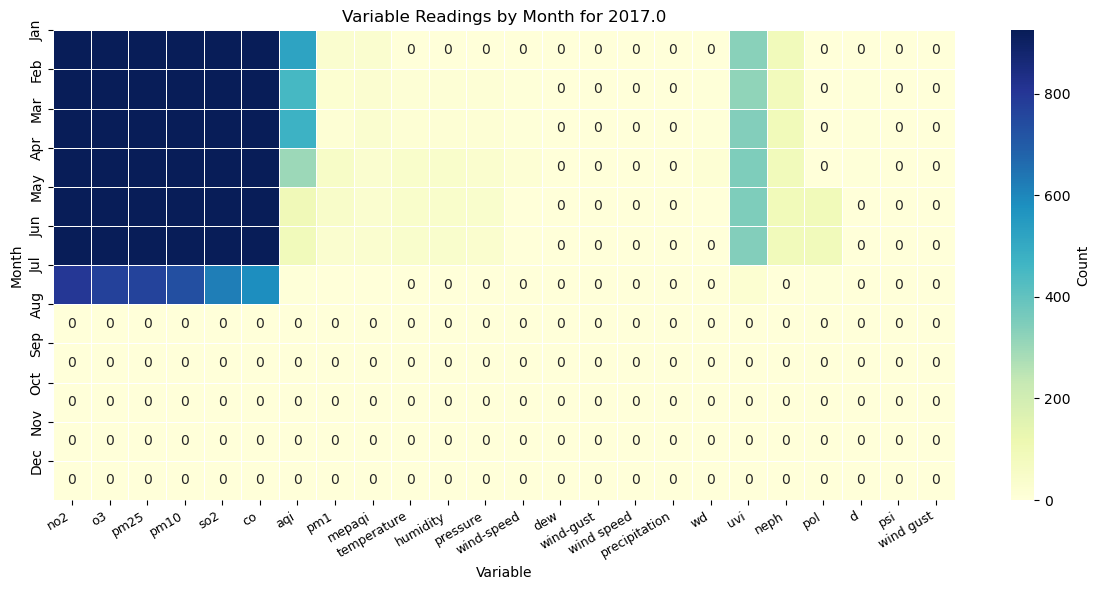

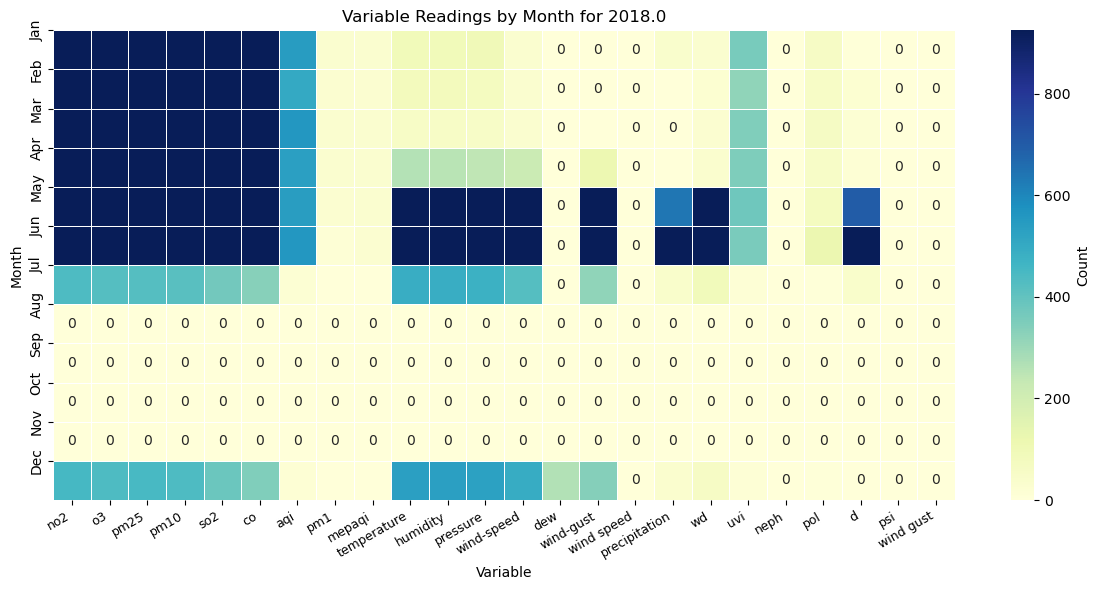

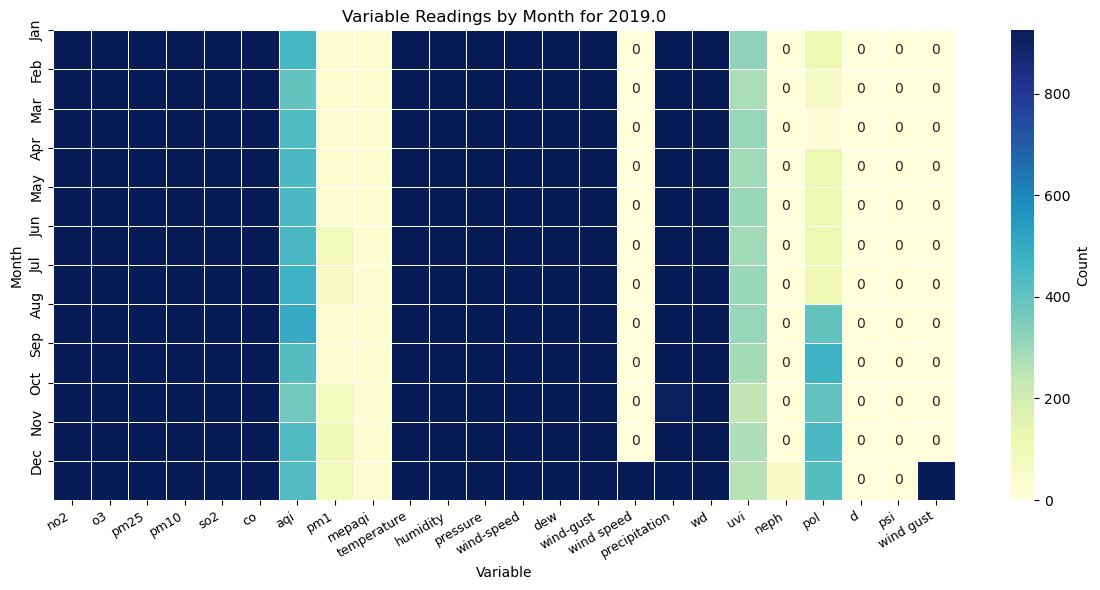

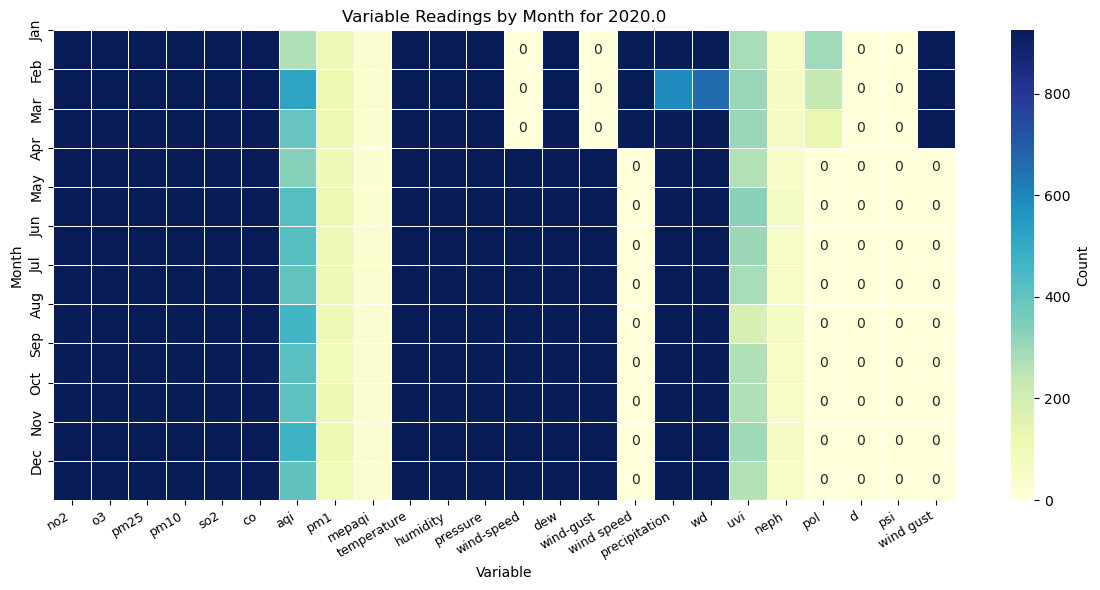

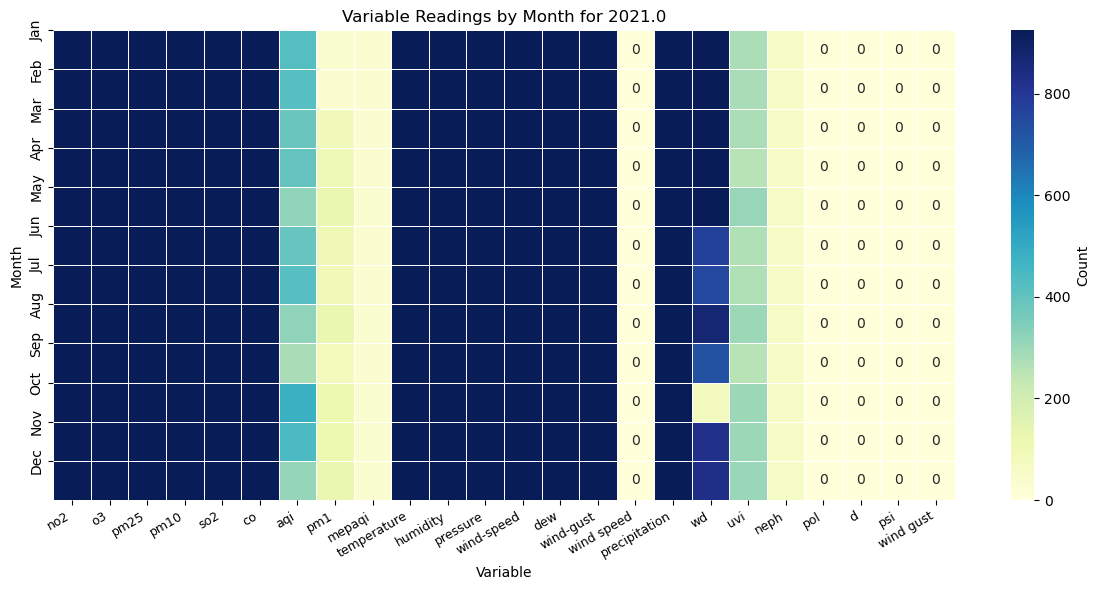

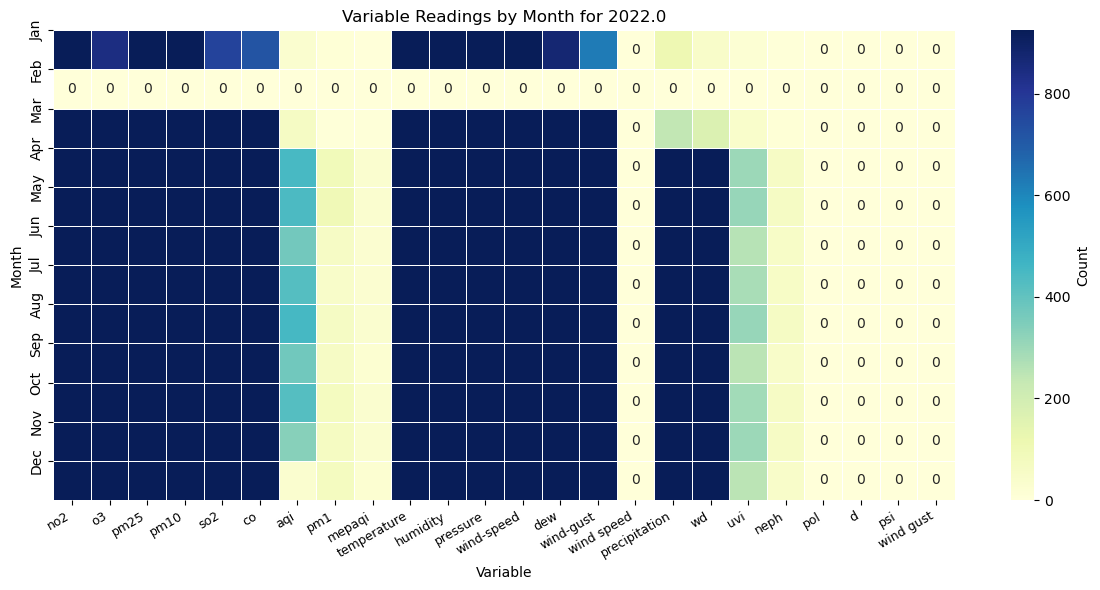

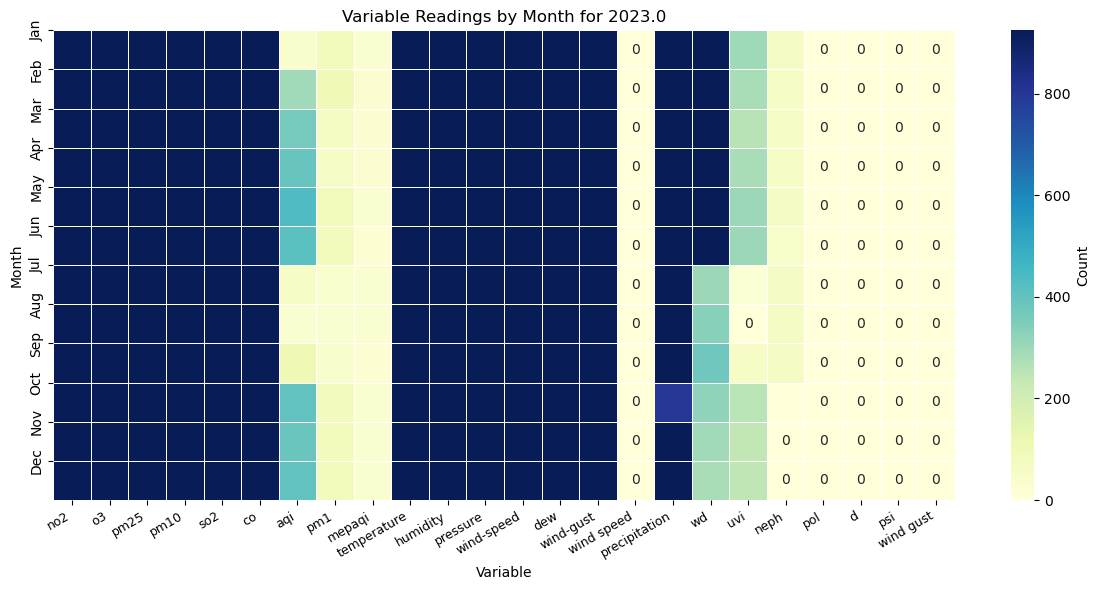

In [ ]:

# Group variables by type
pollutants = ['no2', 'o3', 'pm25', 'pm10', 'so2', 'co', 'aqi', 'pm1', 'mepaqi']
weather = ['temperature', 'humidity', 'pressure', 'wind-speed', 'dew', 'wind-gust', 'wind speed', 'precipitation', 'wd', 'uvi', 'neph', 'pol', 'd', 'psi', 'wind gust']

# Maximum count across all years for color scale
overall_max = df['count'].max()

# Put all 12 months for each year
all_months = pd.Index(range(1, 13), name="month")

# Get unique years
years = df['year'].unique()

# Create a heatmap for each year
for year in years:
    plt.figure(figsize=(12, 6))  
    
    # Filter for the specific year
    year_data = df[df['year'] == year]
    
    # Pivot table for that year
    monthly_counts = (
        year_data.pivot_table(index='month', columns='variable', values='count', aggfunc='sum', fill_value=0)
        .reindex(all_months, fill_value=0)
    )

    all_variables = pollutants + weather
    monthly_counts = monthly_counts.reindex(columns=all_variables, fill_value=0)

    # Sort columns 
    sorted_columns = pollutants + weather  
    monthly_counts = monthly_counts[sorted_columns]

    # Label 0 values only
    annot_data = np.where(monthly_counts == 0, '0', '')

    # Create heatmap 
    sns.heatmap(monthly_counts, annot=annot_data, cmap='YlGnBu', vmin=0, vmax=overall_max, cbar_kws={'label': 'Count'}, fmt='s', linewidths=0.5)
    
    # Titles and labels
    plt.title(f'Variable Readings by Month for {year}')
    plt.xlabel('Variable')
    plt.ylabel('Month')
    plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Adjust x-axis
    plt.xticks(rotation=30, ha='right', fontsize=9)  # Adjust rotation and font size for clarity
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    
    
    plt.show()

Save all figures into folder 

In [ ]:
# Takes all charts generated and saves them in a folder named after the notebook
# ATTENTION! Type notebook name in notebook_path

notebook_path = "cleaned_data_overview_AQI.ipynb"  
output_dir = Path(notebook_path + "_charts")
output_dir.mkdir(exist_ok=True)

# Load the notebook content
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Iterate over each cell in the notebook
for i, cell in enumerate(nb.cells):
    # Check if the cell has outputs and contains images
    if 'outputs' in cell:
        # Filter out cells with no chart (image/png)
        image_outputs = [output for output in cell['outputs'] if 'data' in output and 'image/png' in output['data']]
        
        # If there are no image outputs, skip the cell
        if not image_outputs:
            continue

        # Create a folder for the cell based on its index
        cell_folder = output_dir / f"cell_{i+1}"
        cell_folder.mkdir(exist_ok=True)
        
        image_counter = 1
        
        # Process each image output
        for output in image_outputs:
            # Decode the base64 image data
            image_data = output['data']['image/png']
            image_bytes = base64.b64decode(image_data)
            
            # Save image with a unique name based on the image count in the current cell
            image_filename = cell_folder / f"image_{image_counter}.png"
            with open(image_filename, "wb") as img_file:
                img_file.write(image_bytes)
            
            image_counter += 1

print(f"Images saved in '{output_dir}'")

Current figures: []
